In [9]:
import numpy as np             # numpy is a general-purpose math package
import yt                       # yt is the data vizualization package
from yt.units import *          # this lets you get things like speed of light in proper units just by typing 'c'
from astropy.table import Table # this is needed for reading in various foggie data byproducts
from astropy.io import ascii    # this too
import matplotlib.pyplot as plt # this is the standard python plotting package, very useful!
from mpl_toolkits.axes_grid1 import make_axes_locatable
import matplotlib
import math

# These imports are FOGGIE-specific files
from foggie.utils.consistency import *
from foggie.utils.foggie_load import *

foggie_dir = "/Users/hylee/foggie/foggie_sims/halo_008508/nref11c_nref9f/"
# code_path should be the path to the directory where you've cloned the github repo.
code_path = "/Users/hylee/coding/foggie/foggie/"
# Finally, this is the name of the simulation output.

foggie_dir_output = "/Users/hylee/foggie/foggie_output/halo_008508/nref11c_nref9f/"

foggie_sim = "/Users/hylee/foggie/foggie_sims/halo_008508/nref11c_nref9f/"
github_dir = "/Users/hylee/coding/foggie/foggie/" 
snap = "RD0039"
foggie_output = '/Users/hylee/foggie/foggie_output/halo_008508/nref11c_nref9f/'
track_dir = github_dir + 'halo_infos/008508/nref11c_nref9f/'
track_name = github_dir + 'halo_tracks/008508/nref11n_selfshield_15/halo_track_200kpc_nref9'
snap_name = foggie_sim + snap + '/' + snap

In [10]:
ds, refine_box = foggie_load(snap_name, track_name, halo_c_v_name=track_dir + 'halo_c_v',
                             disk_relative=False, do_filter_particles=False, masses_dir=track_dir)

yt : [INFO     ] 2023-07-21 15:44:52,247 Parameters: current_time              = 551.00638892344
yt : [INFO     ] 2023-07-21 15:44:52,248 Parameters: domain_dimensions         = [256 256 256]
yt : [INFO     ] 2023-07-21 15:44:52,249 Parameters: domain_left_edge          = [0. 0. 0.]


Opening snapshot /Users/hylee/foggie/foggie_sims/halo_008508/nref11c_nref9f/RD0039/RD0039


yt : [INFO     ] 2023-07-21 15:44:52,250 Parameters: domain_right_edge         = [1. 1. 1.]
yt : [INFO     ] 2023-07-21 15:44:52,251 Parameters: cosmological_simulation   = 1
yt : [INFO     ] 2023-07-21 15:44:52,252 Parameters: current_redshift          = 0.14999996432242
yt : [INFO     ] 2023-07-21 15:44:52,253 Parameters: omega_lambda              = 0.715
yt : [INFO     ] 2023-07-21 15:44:52,254 Parameters: omega_matter              = 0.285
yt : [INFO     ] 2023-07-21 15:44:52,254 Parameters: omega_radiation           = 0
yt : [INFO     ] 2023-07-21 15:44:52,255 Parameters: hubble_constant           = 0.695


get_refine_box: using this location:       col1         col2    col3     col4     col5    col6     col7   col8
---------------- ------- -------- -------- ------- -------- -------- ----
0.14989229912954 0.48935 0.472477 0.507574 0.49135 0.474477 0.509574    9


Parsing Hierarchy : 100%|█████████████████| 5182/5182 [00:00<00:00, 9498.18it/s]
yt : [INFO     ] 2023-07-21 15:44:53,204 Gathering a field list (this may take a moment.)


Pulling halo center from catalog file


In [11]:
def frb_projection(ds, field, axis, data_source, width, resolution, weight_field = None):
    proj = ds.proj(("gas", field), axis, center = ds.halo_center_kpc, data_source = data_source)
    width = (width, "kpc")
    resolution = [resolution,resolution]
    frb = proj.to_frb(width, resolution, center = ds.halo_center_kpc)
    return frb

In [16]:
#%matplotlib inline
def projection(frb, field, width, colorlabel, axis, snap, fontsize = 15):
#    matplotlib.use("Agg")
    fig, ax = plt.subplots()
    divider = make_axes_locatable(ax)
    cax = divider.append_axes('right', size='5%', pad=0.05)
    im = ax.imshow((np.array(np.log10(frb["gas",field]))), 
                   cmap='viridis', extent = [-width/2, width/2, -width/2, width/2])
    fig.colorbar(im, cax=cax, orientation='vertical')
    cbar = fig.colorbar(im, cax=cax, orientation='vertical')
    cbar.ax.tick_params(labelsize = 15) 
    cbar.set_label(colorlabel) #=> change this to density & increase the fontsize  'Density [log 10 g/cm^3]'

    ax.set_title(snap)

    if axis == "x":
        ax.set_xlabel('Distance in y axis from center [kpc]', fontsize=fontsize)
        ax.set_ylabel('Distance in z axis from center [kpc]', fontsize=fontsize)
    elif axis == "y":
        ax.set_xlabel('Distance in z axis from center [kpc]', fontsize=fontsize)
        ax.set_ylabel('Distance in x axis from center [kpc]', fontsize=fontsize)
    elif axis == "z":
        ax.set_xlabel('Distance in x axis from center [kpc]', fontsize=fontsize)
        ax.set_ylabel('Distance in y axis from center [kpc]', fontsize=fontsize)
    
    plt.xticks(fontsize = fontsize)
    plt.yticks(fontsize = fontsize)
    
    plt.show()
    return fig

yt : [INFO     ] 2023-07-21 15:56:57,900 Projection completed
yt : [INFO     ] 2023-07-21 15:56:57,925 Making a fixed resolution buffer of (('gas', 'density')) 70 by 70


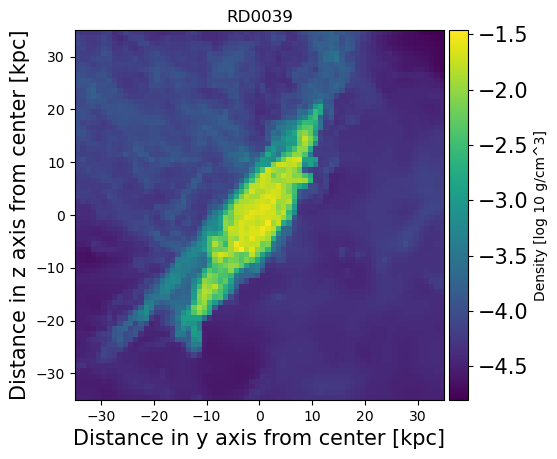

In [17]:
field, axis, width, resolution, colorlabel = "density", "x", 70, 70, 'Density [log 10 g/cm^3]'
frb = frb_projection(ds, field, axis, refine_box, width, resolution, weight_field = None)
fig = projection(frb, field, width, colorlabel, axis, snap, fontsize = 15)